# <span style="color:blue">[</span> Lab 11-5: MNIST and Deep learning CNN <span style="color:blue">]</span>
 <p> &nbsp;출처: <a href="http://hunkim.github.io/ml/" title="모두를 위한 머신러닝과 딥러닝의 강의" target="blank">모두를 위한 머신러닝과 딥러닝의 강의</a></p> <br/>
 > [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/)

# Import Module

In [1]:
# Lab 11 MNIST and Deep learning CNN
# https://www.tensorflow.org/tutorials/layers
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

# Read in data
> using TF Learn's built in function to load MNIST data to the folder data/mnist <br/>
> Check out [MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners) for more information about the mnist dataset

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Define paramaters for the model

In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

tf.set_random_seed(777)  # reproducibility

# Define Model class for the model

In [4]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

        
    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3], 
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], 
                                     padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3], 
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.7, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3], 
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.7, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], 
                             feed_dict={self.X: x_data, self.Y: y_data, self.training: training})

# Initialize session & global variables

In [5]:
# initialize
sess = tf.Session()

models = []
num_models = 2

for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')


Learning Started!


# Train the model

In [6]:
# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')


Epoch: 0001 cost = [ 0.82301329  0.78710558]
Epoch: 0002 cost = [ 0.29245963  0.29475425]
Epoch: 0003 cost = [ 0.22505855  0.2326298 ]
Epoch: 0004 cost = [ 0.19634524  0.19933481]
Epoch: 0005 cost = [ 0.17925078  0.18856686]
Epoch: 0006 cost = [ 0.1685262   0.17661244]
Epoch: 0007 cost = [ 0.16255084  0.16589968]
Epoch: 0008 cost = [ 0.15454819  0.15984705]
Epoch: 0009 cost = [ 0.15454049  0.15112051]
Epoch: 0010 cost = [ 0.1446972   0.14796367]
Epoch: 0011 cost = [ 0.14484089  0.1460067 ]
Epoch: 0012 cost = [ 0.14009409  0.14440217]
Epoch: 0013 cost = [ 0.13837107  0.14274602]
Epoch: 0014 cost = [ 0.13534261  0.13822107]
Epoch: 0015 cost = [ 0.13181176  0.13530688]
Epoch: 0016 cost = [ 0.12791288  0.13616303]
Epoch: 0017 cost = [ 0.1297734   0.13808447]
Epoch: 0018 cost = [ 0.12941699  0.13592612]
Epoch: 0019 cost = [ 0.12777477  0.12895046]
Epoch: 0020 cost = [ 0.12475849  0.13268489]
Learning Finished!


# Test model and check accuracy

0 Accuracy: 0.9902
1 Accuracy: 0.9904
Ensemble accuracy: 0.9905
Label:  [4]
Prediction:  [4]


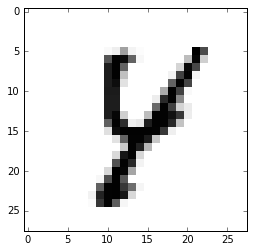

'\n0 Accuracy: 0.9933\n1 Accuracy: 0.9946\n2 Accuracy: 0.9934\n3 Accuracy: 0.9935\n4 Accuracy: 0.9935\n5 Accuracy: 0.9949\n6 Accuracy: 0.9941\n\nEnsemble accuracy: 0.9952\n'

In [7]:
# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))

print('Ensemble accuracy:', sess.run(ensemble_accuracy))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(m.predict(mnist.test.images[r:r + 1]),1)))
      
# show image
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


'''
0 Accuracy: 0.9933
1 Accuracy: 0.9946
2 Accuracy: 0.9934
3 Accuracy: 0.9935
4 Accuracy: 0.9935
5 Accuracy: 0.9949
6 Accuracy: 0.9941

Ensemble accuracy: 0.9952
'''